In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,f_oneway,chi2_contingency
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

In [49]:
df=pd.read_csv(r"C:\Users\HP\Downloads\alzheimers_disease_data.csv")

In [50]:
pd.set_option('display.max_columns', None)

 Data Understanding and Cleaning

In [51]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [52]:
df.dropna(inplace=True)

In [53]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


Removing any columns

In [54]:
df=df.drop(columns=['PatientID','DoctorInCharge','Ethnicity','EducationLevel'])

In [8]:
df.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


Data Transformation

In [9]:
df['Disorientation'].unique()

array([0, 1], dtype=int64)

In [55]:
df[[ 
    'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 
    'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 
    'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 
    'DifficultyCompletingTasks', 'Forgetfulness'
]] = df[[ 
    'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 
    'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 
    'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 
    'DifficultyCompletingTasks', 'Forgetfulness'
]].replace({1: 'Yes', 0: 'No'})

In [56]:
df['Gender'] = df['Gender'].replace({0: 'M', 1: 'F'})

In [57]:
df['Diagnosis'] = df['Diagnosis'].replace({1: 'Positive', 0: 'Negative'})

In [12]:
df.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,22.927749,Yes,13.297218,6.327112,1.347214,9.025679,Yes,Yes,No,No,Yes,Yes,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,Yes,Yes,1.725883,Yes,Yes,Yes,No,Yes,Positive
1,89,0,26.827681,Yes,4.542524,7.619885,0.518767,7.151293,Yes,Yes,Yes,Yes,Yes,Yes,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,Yes,Yes,2.592424,Yes,Yes,Yes,Yes,No,Positive
2,73,0,17.795882,Yes,19.555085,7.844988,1.826335,9.673574,No,Yes,Yes,Yes,Yes,Yes,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,Yes,Yes,7.119548,Yes,No,Yes,No,Yes,Positive
3,74,1,33.800817,No,12.209266,8.428001,7.435604,8.392554,Yes,Yes,Yes,Yes,Yes,Yes,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,Yes,No,6.481226,Yes,Yes,Yes,Yes,Yes,Positive
4,89,0,20.716974,Yes,18.454356,6.310461,0.795498,5.597238,Yes,Yes,Yes,Yes,Yes,Yes,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,Yes,Yes,0.014691,Yes,Yes,No,No,Yes,Positive


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   BMI                        2149 non-null   float64
 3   Smoking                    2149 non-null   object 
 4   AlcoholConsumption         2149 non-null   float64
 5   PhysicalActivity           2149 non-null   float64
 6   DietQuality                2149 non-null   float64
 7   SleepQuality               2149 non-null   float64
 8   FamilyHistoryAlzheimers    2149 non-null   object 
 9   CardiovascularDisease      2149 non-null   object 
 10  Diabetes                   2149 non-null   object 
 11  Depression                 2149 non-null   object 
 12  HeadInjury                 2149 non-null   object 
 13  Hypertension               2149 non-null   objec

Exploratory Data Analysis (EDA)

Summary statistics (mean, median, quartiles) for numerical features and
interpret key findings.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
SystolicBP,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352


Visualizing the distribution of the diagnosis variable and assess class imbalance

In [58]:
Diagnosis_count=df['Diagnosis'].value_counts()

In [59]:
Diagnosis_count

Diagnosis
Negative    1389
Positive     760
Name: count, dtype: int64

<Axes: xlabel='Diagnosis'>

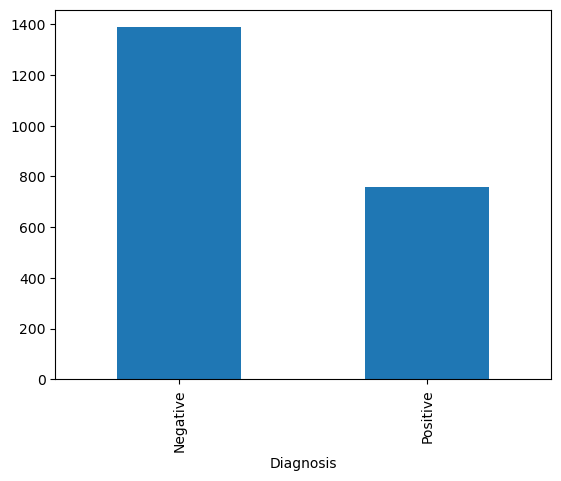

In [60]:
Diagnosis_count.plot(kind='bar')

Generating boxplots of numerical features grouped by diagnosis. Identify features
with significant differences.

In [18]:
import warnings as wa
wa.filterwarnings('ignore')

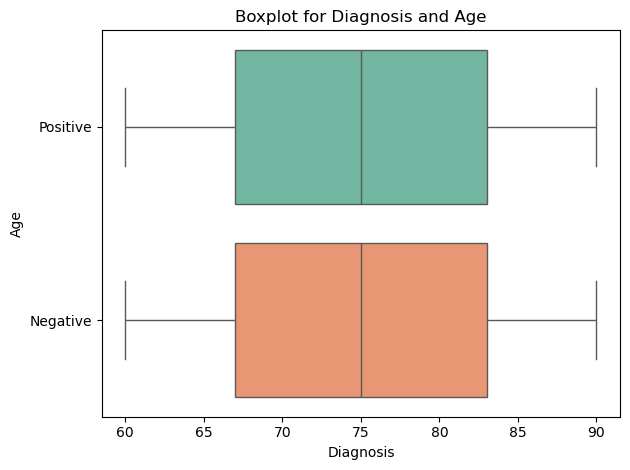

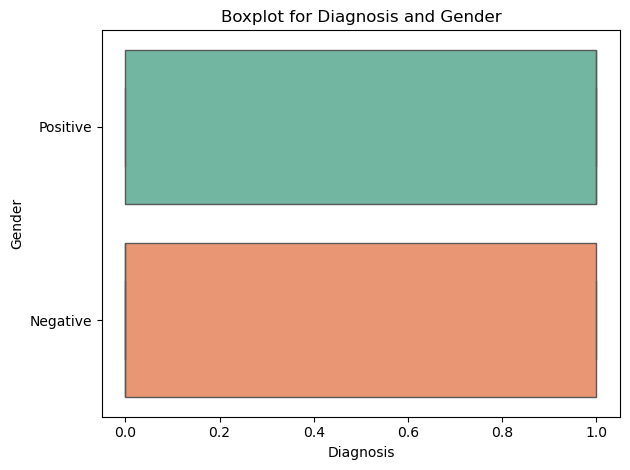

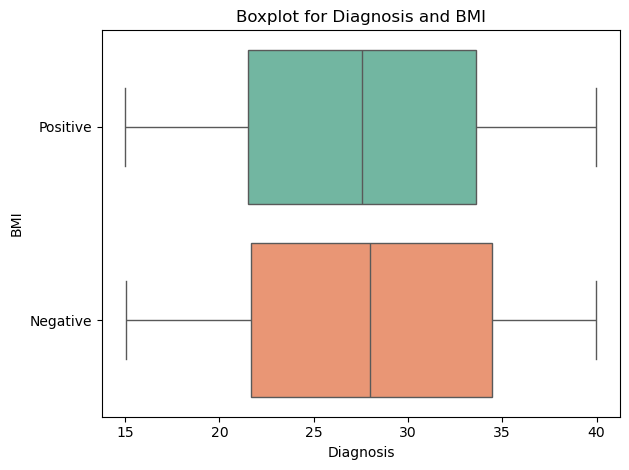

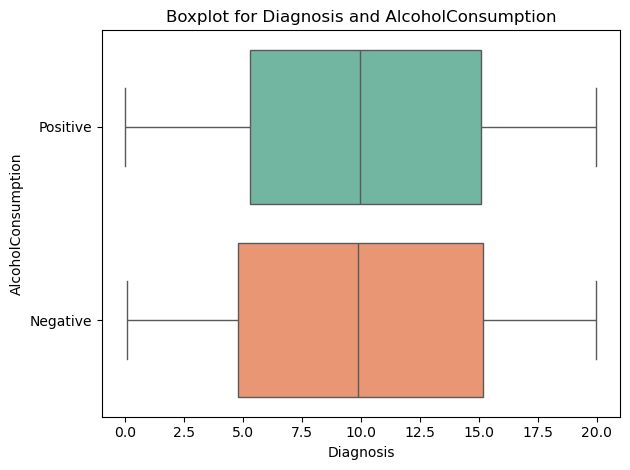

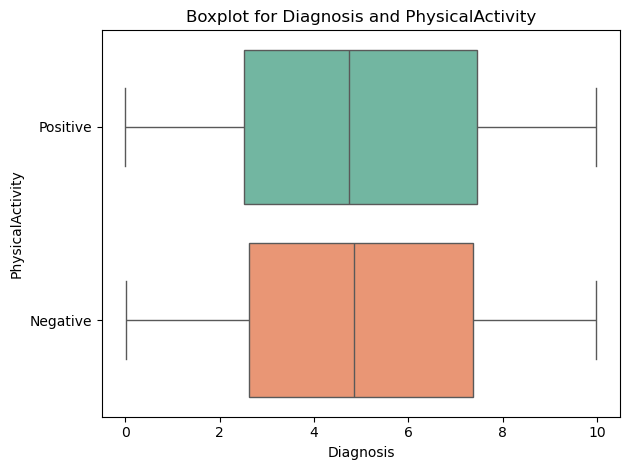

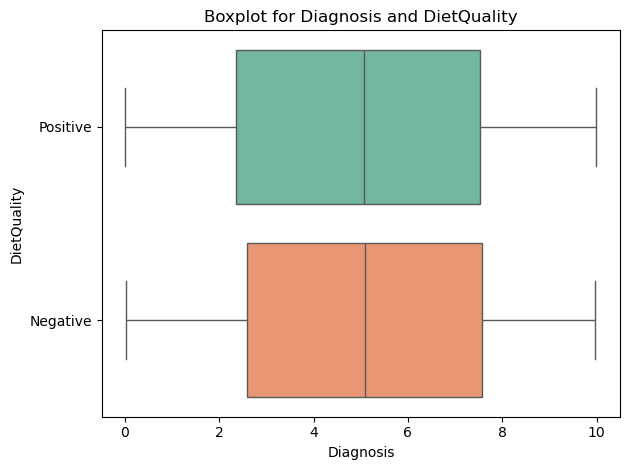

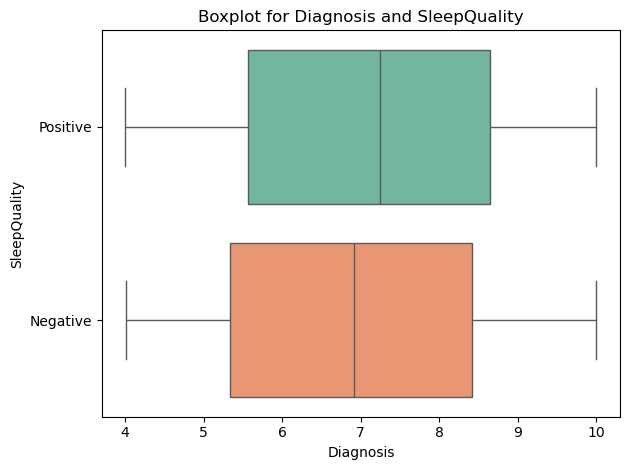

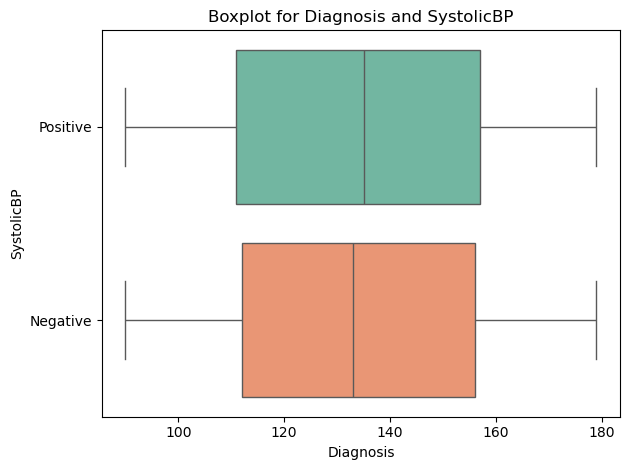

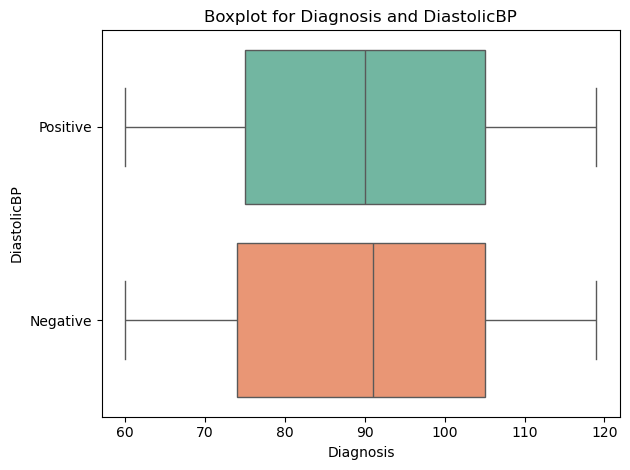

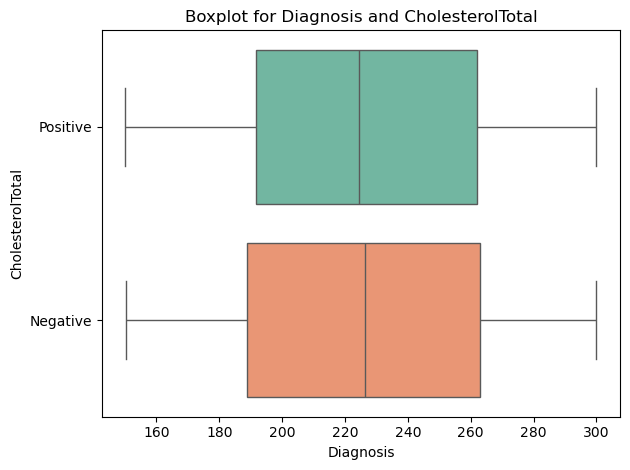

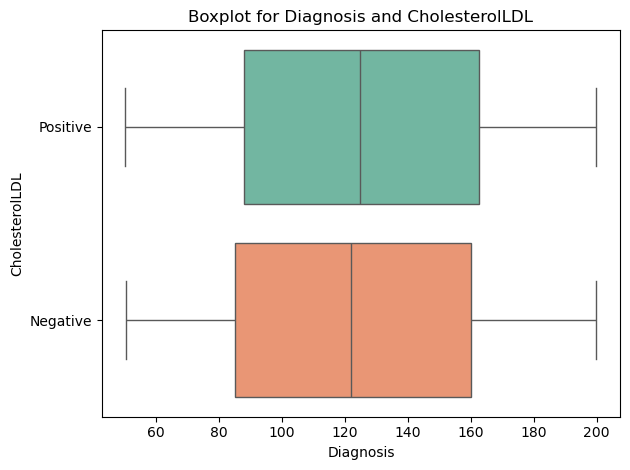

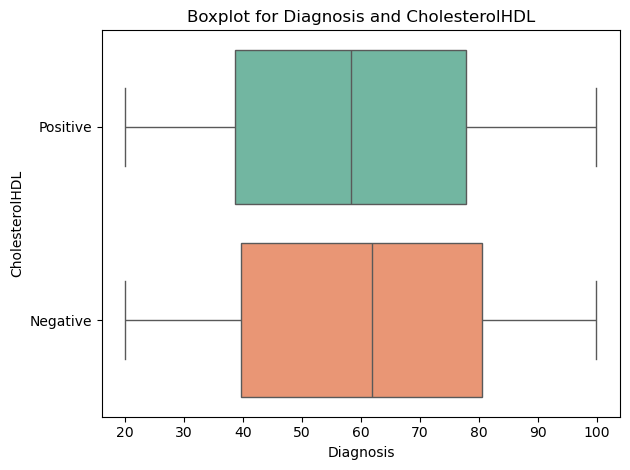

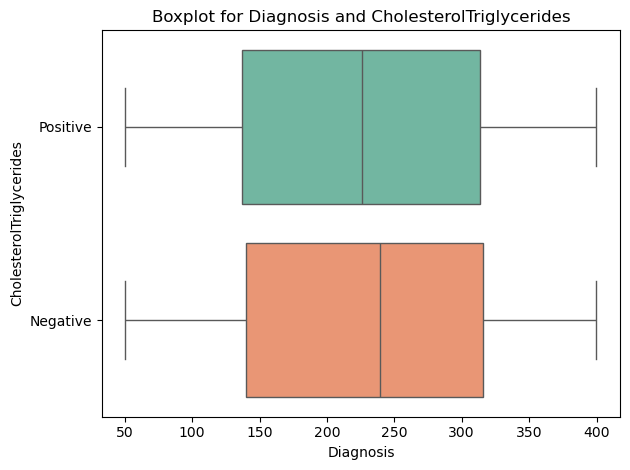

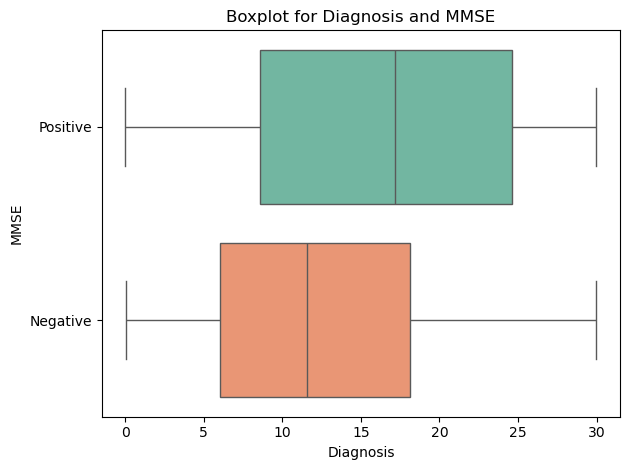

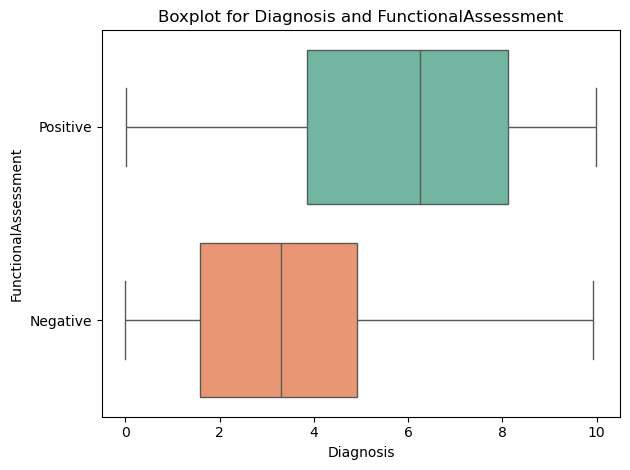

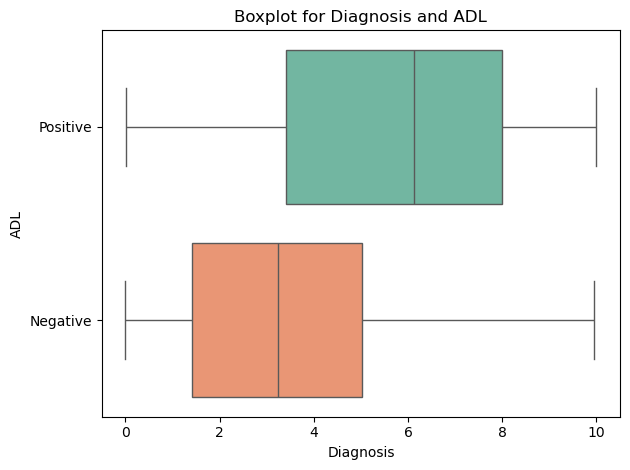

In [19]:
num_col= df.select_dtypes('number').columns
for col in num_col:
    sns.boxplot(y='Diagnosis',x=col,data=df, palette = 'Set2')
    plt.title(f'Boxplot for Diagnosis and {col}')
    plt.xlabel('Diagnosis')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Ploting count distributions of categorical variables across diagnosis groups and
discuss notable patterns.

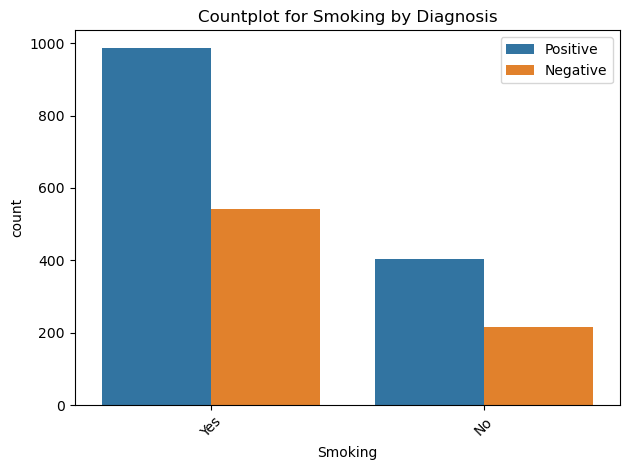

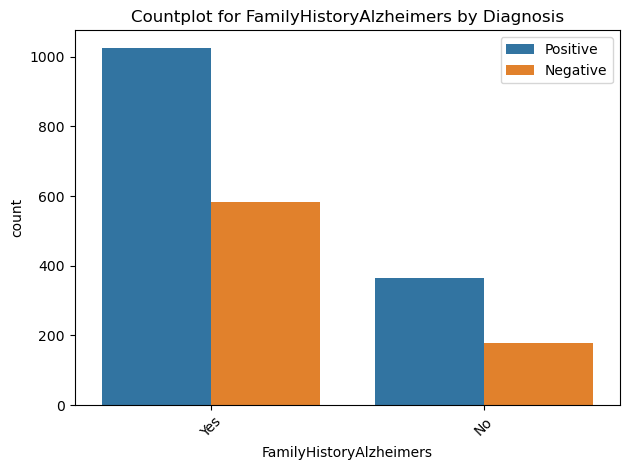

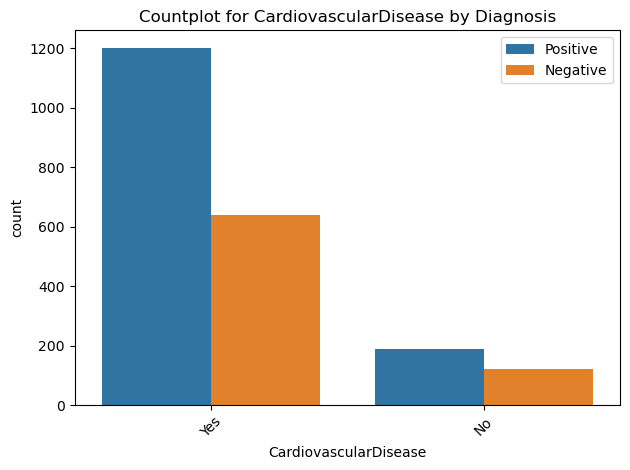

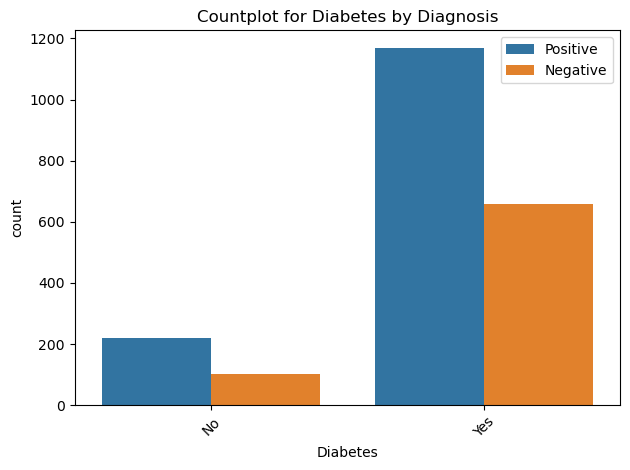

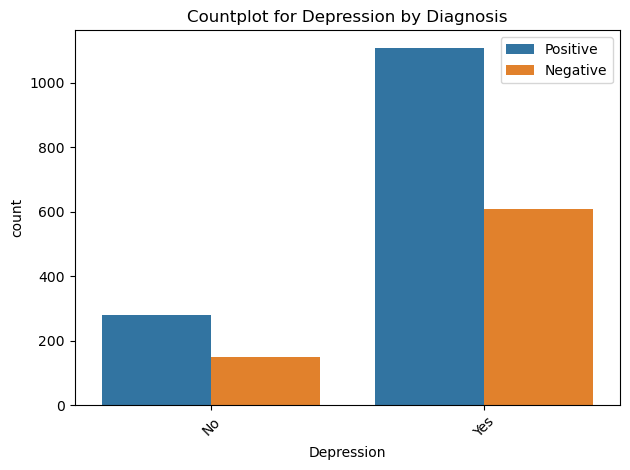

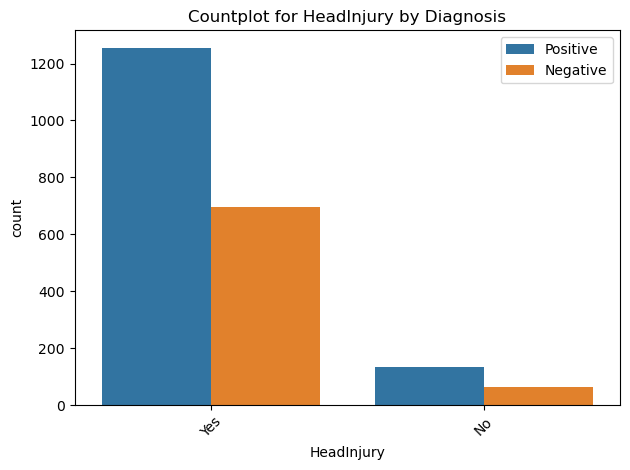

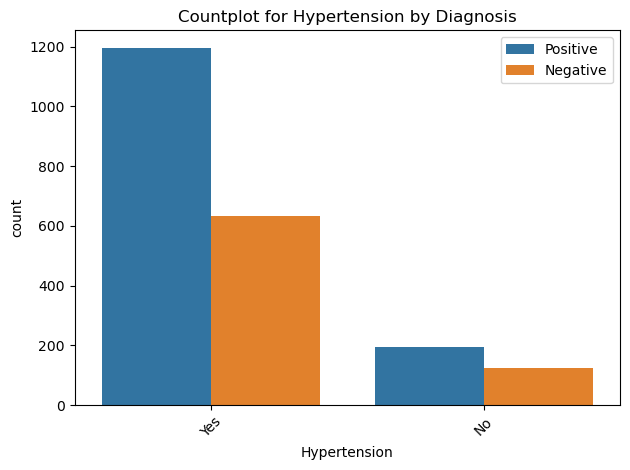

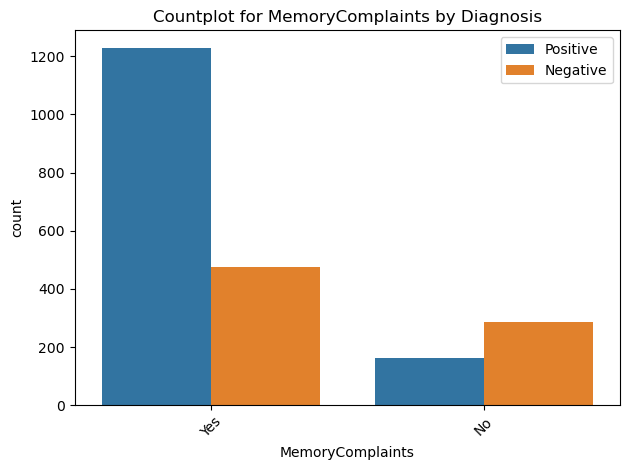

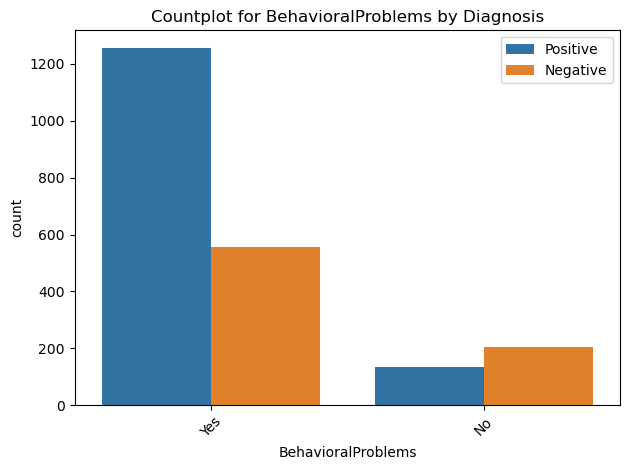

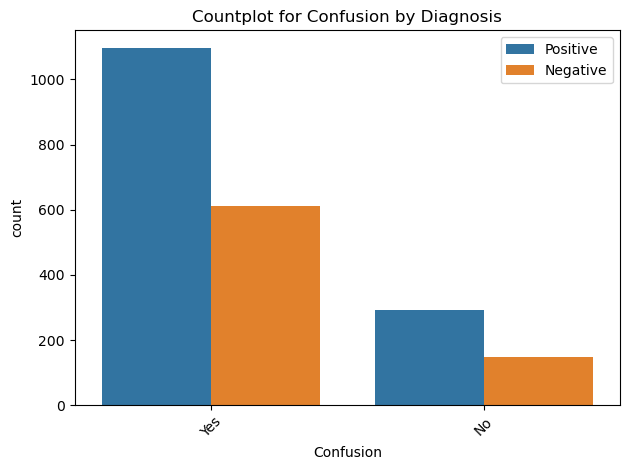

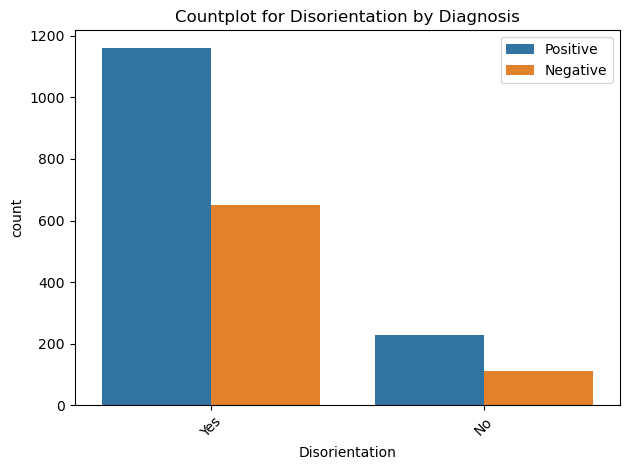

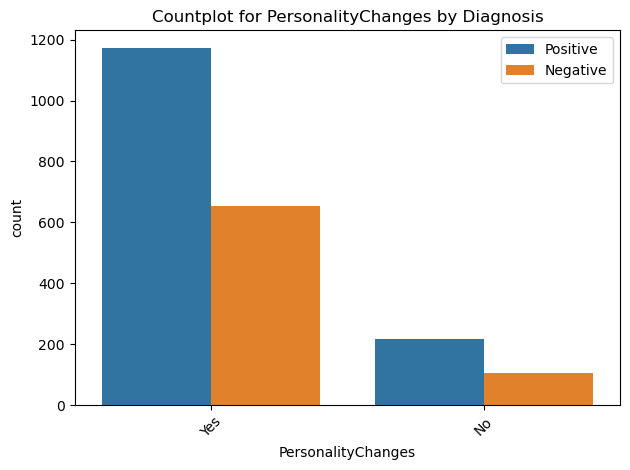

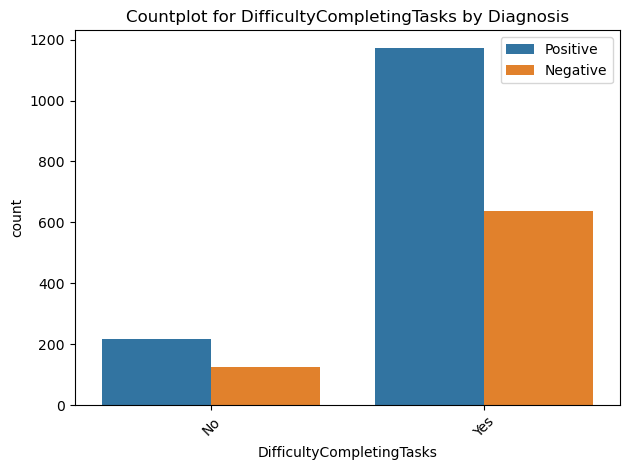

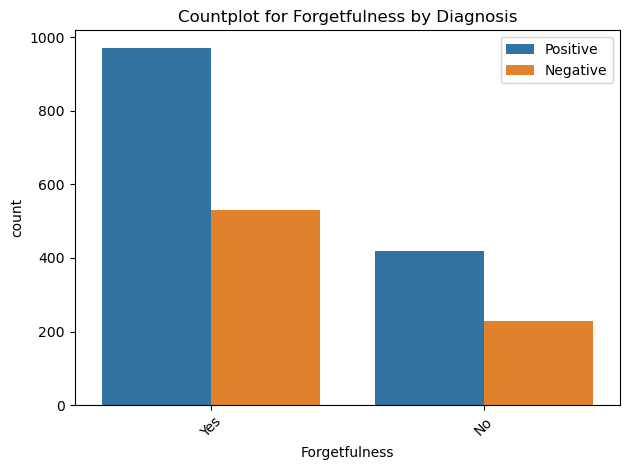

In [20]:
cat_col=df.select_dtypes('object').drop(columns = 'Diagnosis').columns
for col in cat_col:
    sns.countplot(x=col,hue='Diagnosis',data=df)
    plt.title(f'Countplot for {col} by Diagnosis')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Analyzing correlation between features and between features and diagnosis.
Highlight important relationships.

Correlation Between Numerical Features

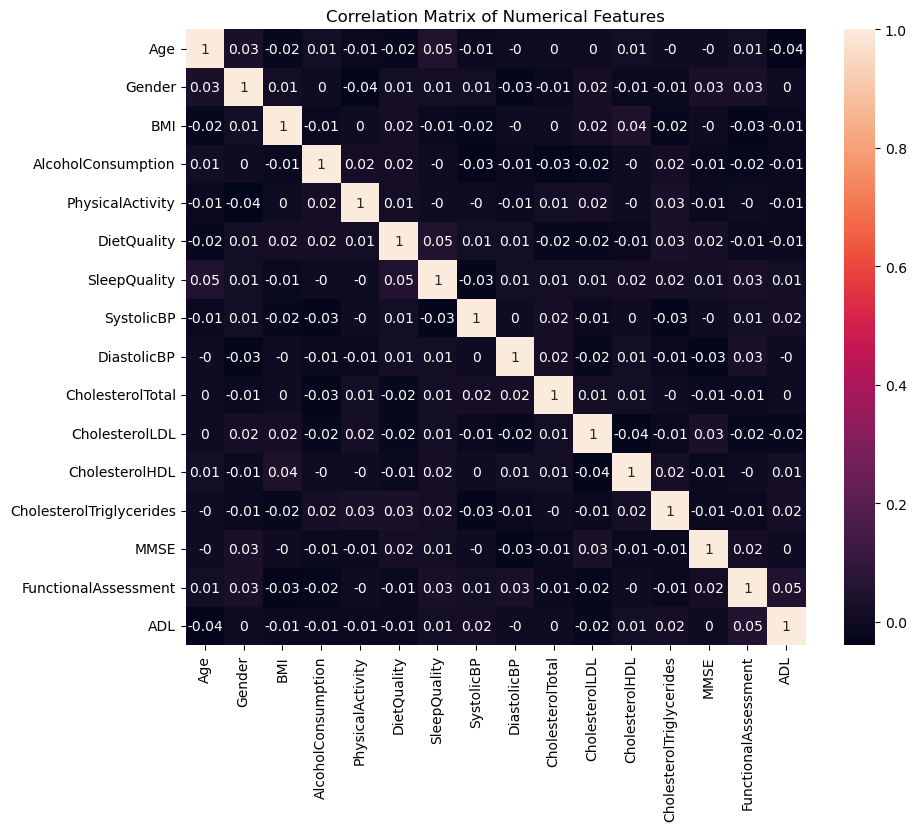

In [21]:
plt.figure(figsize = (10, 8))
num_df=df.select_dtypes('number')
corr_matrix=round(num_df.corr(),2)
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Correlation Between  Numerica Features and Diagnosis  for me to get the correlation I have to convert Diagnois back to integer

In [23]:
df['Diagnosis'] = df['Diagnosis'].replace({ 'Positive':0, 'Negative':1})

In [24]:
corr = []
num_col = df.select_dtypes('number').columns
for i in num_col:
    cor = round(df[i].corr(df['Diagnosis']), 2)
    corr.append({i:cor})


corr

[{'Age': -0.01},
 {'BMI': 0.03},
 {'AlcoholConsumption': -0.01},
 {'PhysicalActivity': 0.01},
 {'DietQuality': 0.01},
 {'SleepQuality': -0.06},
 {'SystolicBP': -0.02},
 {'DiastolicBP': 0.01},
 {'CholesterolTotal': 0.01},
 {'CholesterolLDL': -0.03},
 {'CholesterolHDL': 0.04},
 {'CholesterolTriglycerides': 0.02},
 {'MMSE': -0.24},
 {'FunctionalAssessment': -0.36},
 {'ADL': -0.33},
 {'Diagnosis': 1.0}]

Data Preprocessing and Feature Engineering

In [ ]:
Spliting the dataset into training and test sets (e.g., 80/20 split).

In [61]:
df['Diagnosis'] = df['Diagnosis'].replace({'Positive': 1,'Negative':0})

In [62]:
df['Gender'] = df['Gender'].replace({'M':'MALE', 'F':'FEMALE'})

In [63]:
X=df.drop('Diagnosis',axis=1)
y=df['Diagnosis']

In [64]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2144    1
2145    1
2146    1
2147    1
2148    0
Name: Diagnosis, Length: 2149, dtype: int64

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
creating separate pipelines for numerical and categorical features including
imputation and scaling/encoding:

In [32]:
cat_features=X.select_dtypes('object').columns
num_features=X.select_dtypes('number').columns

In [33]:
cat_features_pipeline = Pipeline([
    ('cat_features_imput', SimpleImputer(strategy = 'most_frequent')),
    ('cat_features_enc', OneHotEncoder(handle_unknown = 'ignore'))
])

In [34]:
num_features_pipeline = Pipeline([
    ('num_features_imput', SimpleImputer(strategy = 'mean')),
    ('num_features_scaler', StandardScaler())
])

In [35]:
transformer=ColumnTransformer([('cat_features',cat_features_pipeline,cat_features),
                               ('num_features',num_features_pipeline,num_features)])

,Diagnosis
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
2144,Negative
2145,Negative
2146,Negative
2147,Negative


In [73]:
models={
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

In [82]:
samplers={
    'Smote':SMOTE(),
    'OvSampler':RandomOverSampler(),
    'UnSampler':RandomUnderSampler()
}

In [121]:
class TrainModel:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def train(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.2, random_state = 34)
        cat_features_pipeline = Pipeline([
            ('cat_features_imput', SimpleImputer(strategy = 'most_frequent')),
            ('cat_features_enc', OneHotEncoder(handle_unknown = 'ignore'))
        ])
        num_features_pipeline = Pipeline([
            ('num_features_imput', SimpleImputer(strategy = 'mean')),
            ('num_features_scaler', StandardScaler())
        ])
        transformer=ColumnTransformer([
            ('cat_features',cat_features_pipeline,cat_features),
            ('num_features',num_features_pipeline,num_features)
        ])
       # pipeline = Pipeline([
        #    ('transformer', transformer)
        result = []
        for name, model in models.items():
            for sampler_name, sampler in samplers.items():
                pipeline_new = ImbPipeline([
                    ('Transformer', transformer),
                    ('Samplers', sampler),
                    ('Models', model)
                ])
                pipeline_new.fit(X_train, y_train)
                y_pred = pipeline_new.predict(X_test)
                acc = round(accuracy_score(y_test, y_pred),2)
                F = round(f1_score(y_test, y_pred),2)
                R = round(recall_score(y_test, y_pred),2)
                P = round(precision_score(y_test, y_pred),2)
                #print(f"Sampler: {sampler_name}, Model: {model_name}, Accuracy: {acc:.4f},F1Score: {F:.4f},Recall: {R:.4f},Precision: {P:.4f},")
                result.append({
                    'Sample': sampler_name,
                    'Model': name,
                    'Accuarcy': acc,
                    'F1-Score': F,
                    'Recall': R,
                    'Precision': P
                })
        

        my_results = pd.DataFrame(result).sort_values(by = 'Recall', ascending = False)
                    
        return my_results

            
            
            

In [122]:
TrainModel(X,y).train()

,Sample,Model,Accuarcy,F1-Score,Recall,Precision
8,UnSampler,GradientBoosting,0.93,0.91,0.94,0.88
9,Smote,XGBoost,0.95,0.93,0.93,0.93
6,Smote,GradientBoosting,0.94,0.92,0.93,0.91
11,UnSampler,XGBoost,0.95,0.93,0.93,0.93
10,OvSampler,XGBoost,0.96,0.94,0.93,0.94
7,OvSampler,GradientBoosting,0.94,0.92,0.93,0.91
17,UnSampler,DecisionTree,0.91,0.87,0.93,0.83
5,UnSampler,RandomForest,0.93,0.90,0.93,0.88
4,OvSampler,RandomForest,0.95,0.92,0.91,0.94
15,Smote,DecisionTree,0.92,0.89,0.91,0.87


In [119]:
class TrainModel:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def train(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.2, random_state = 34)
        cat_features_pipeline = Pipeline([
            ('cat_features_imput', SimpleImputer(strategy = 'most_frequent')),
            ('cat_features_enc', OneHotEncoder(handle_unknown = 'ignore'))
        ])
        num_features_pipeline = Pipeline([
            ('num_features_imput', SimpleImputer(strategy = 'mean')),
            ('num_features_scaler', StandardScaler())
        ])
        transformer=ColumnTransformer([
            ('cat_features',cat_features_pipeline,cat_features),
            ('num_features',num_features_pipeline,num_features)
        ])
       # pipeline = Pipeline([
        #    ('transformer', transformer)
        result = []
        for name, model in models.items():
            for sampler_name, sampler in samplers.items():
                pipeline_new = ImbPipeline([
                    ('Transformer', transformer),
                    ('Samplers', sampler),
                    ('Models', model)
                ])
                pipeline_new.fit(X_train, y_train)
                y_pred = pipeline_new.predict(X_test)
                acc = accuracy_score(y_test, y_pred)
                F = f1_score(y_test, y_pred)
                R = recall_score(y_test, y_pred)
                P = precision_score(y_test, y_pred)
                #print(f"Sampler: {sampler_name}, Model: {model_name}, Accuracy: {acc:.4f},F1Score: {F:.4f},Recall: {R:.4f},Precision: {P:.4f},")
                result.append({
                    'Sample': sampler_name,
                    'Model': name,
                    'Accuarcy': acc,
                    'F1-Score': F,
                    'Recall': R,
                    'Precision': P
                })
        

            my_results = pd.DataFrame(result).sort_values(by = 'Recall', ascending = False)
                    
            return my_results
    def confusion_metrix(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.2, random_state = 34)
        cat_features_pipeline = Pipeline([
        ('cat_features_imput', SimpleImputer(strategy = 'most_frequent')),
        ('cat_features_enc', OneHotEncoder(handle_unknown = 'ignore'))
        ])
        num_features_pipeline = Pipeline([
        ('num_features_imput', SimpleImputer(strategy = 'mean')),
        ('num_features_scaler', StandardScaler())
        ])
        transformer=ColumnTransformer([
        ('cat_features',cat_features_pipeline,cat_features),
        ('num_features',num_features_pipeline,num_features)
        ])
        # pipeline = Pipeline([
        #    ('transformer', transformer)
        result = []
        for name, model in models.items():
            for sampler_name, sampler in samplers.items():
                pipeline_new = ImbPipeline([
                ('Transformer', transformer),
                ('Samplers', sampler),
                ('Models', model)
                ])
                pipeline_new.fit(X_train, y_train)
                y_pred = pipeline_new.predict(X_test)
                cm=confusion_matrix(y_test,y_pred)
                disp = ConfusionMatrixDisplay(cm)
                disp.plot()
                plt.title(f'{model} + {sampler}')
                plt.show()
        

            
            

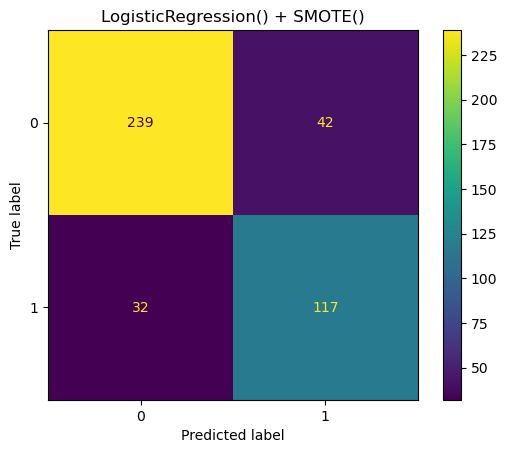

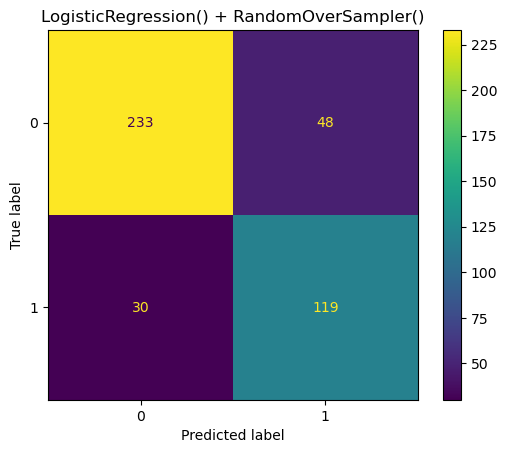

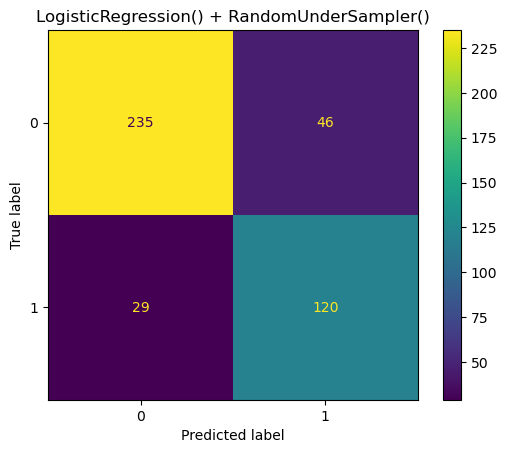

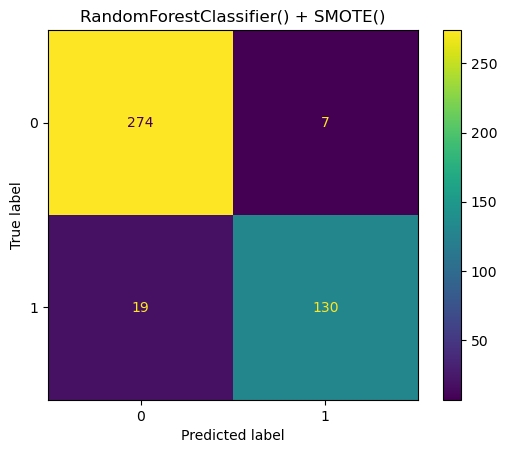

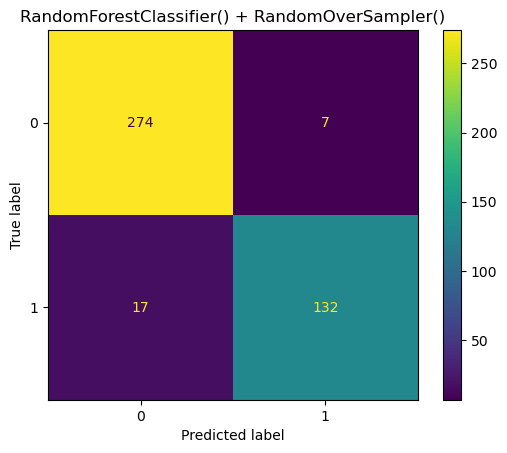

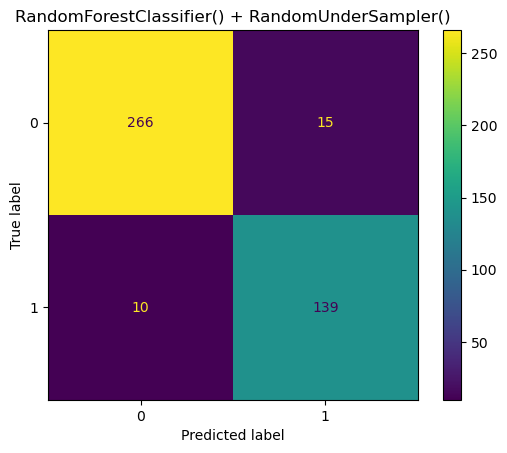

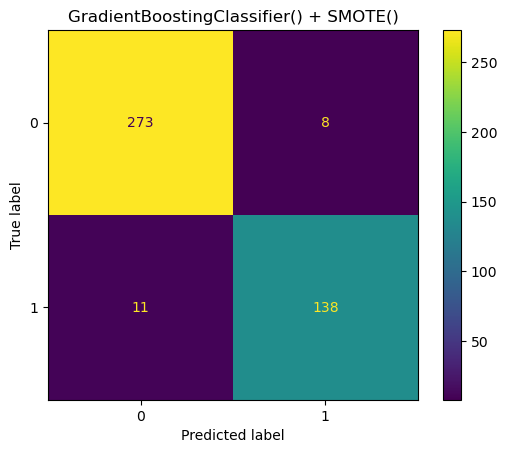

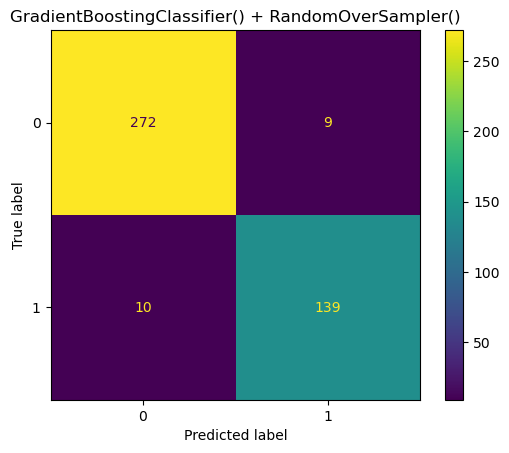

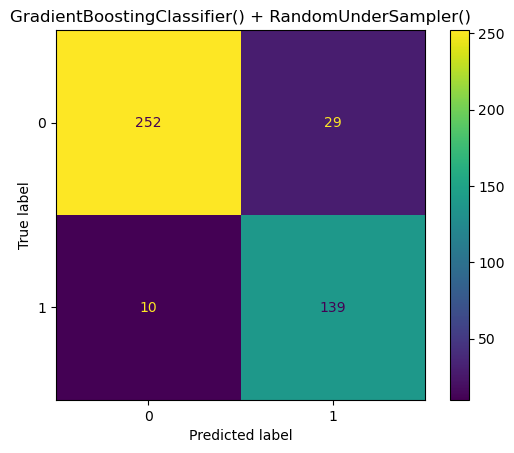

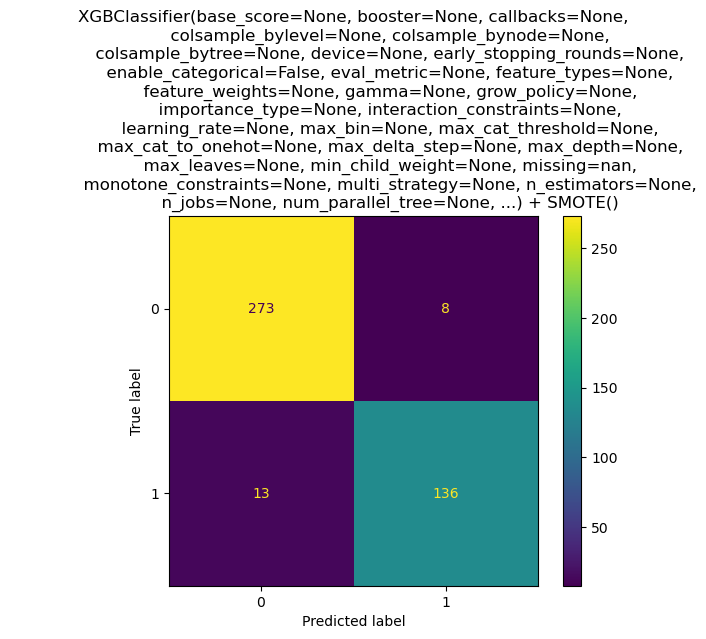

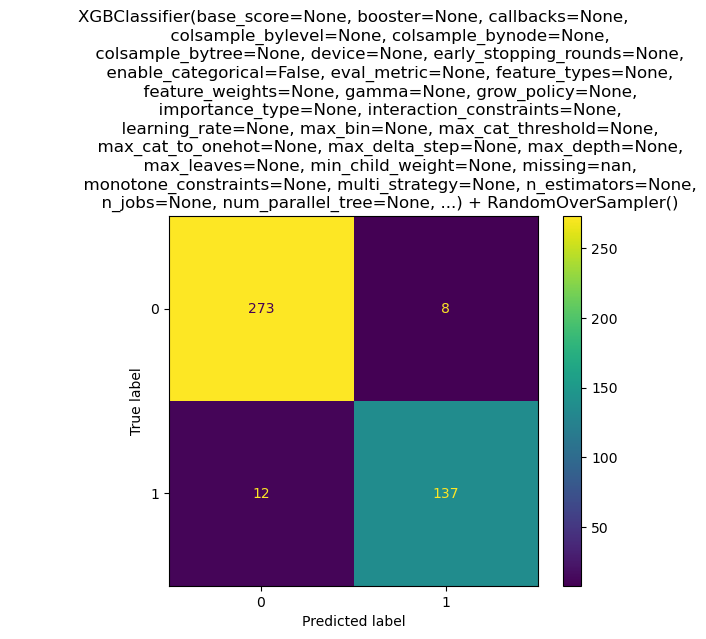

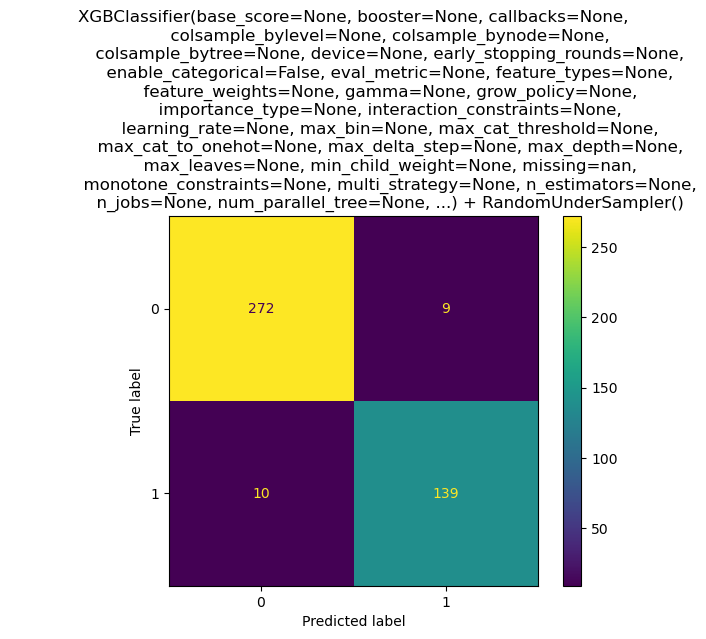

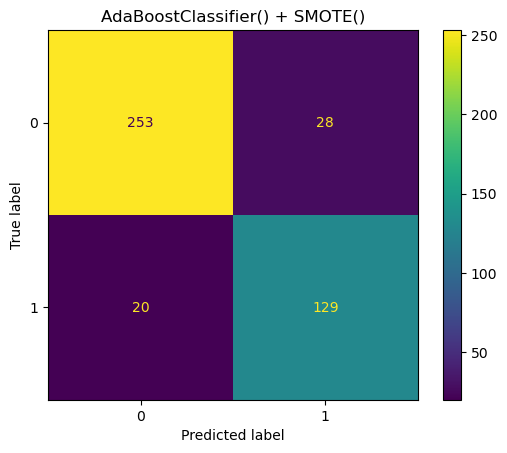

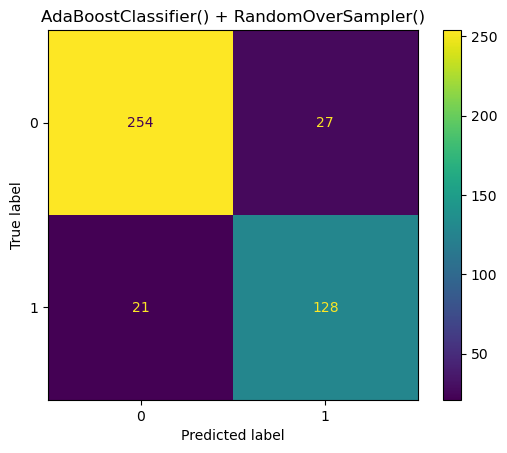

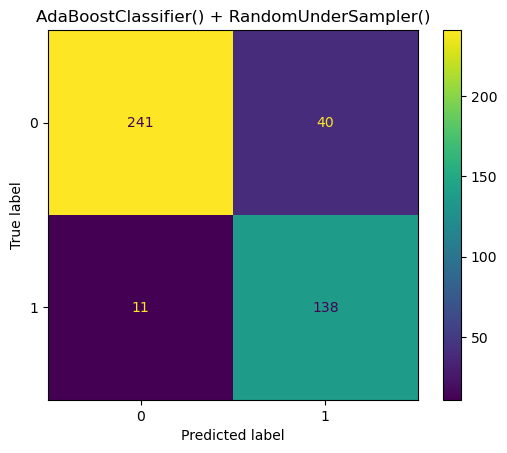

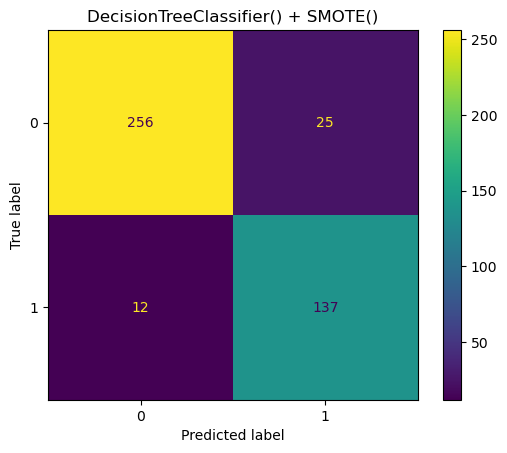

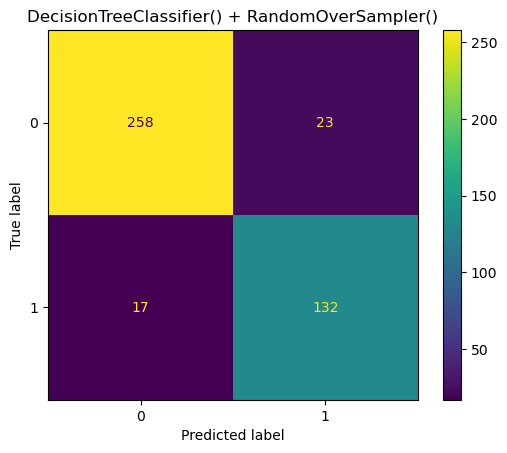

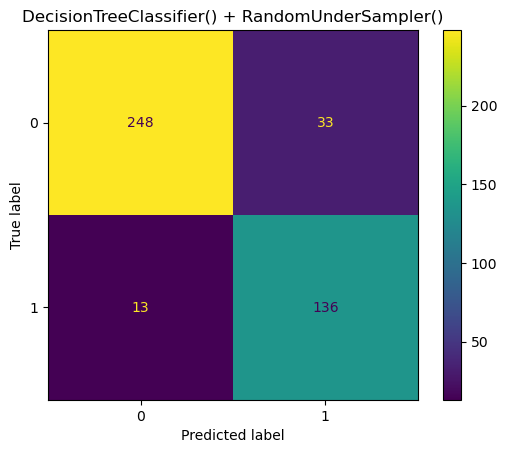

In [120]:
TrainModel(X,y).confusion_metrix()

In [123]:
best_model = pipeline_new['RandomForest_SMOTE']

NameError: name 'pipeline_new' is not defined

In [124]:
pipeline_new

NameError: name 'pipeline_new' is not defined

In [179]:
#pipeline = Pipeline([
    ('Transformer', transformer),
    ('Random Forest', RandomForestClassifier())
])

In [180]:
pipeline

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_features_imput',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_features_enc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
       'M...
                                                                   SimpleImputer()),
                                                                  ('num_features_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'ADL'],
      dtype='object'))])),
                ('Random Forest', RandomForestClassifier())])

In [181]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_features_imput',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_features_enc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
       'M...
                                                                   SimpleImputer()),
                                                                  ('num_features_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'ADL'],
      dtype='object'))])),
                ('Random Forest', RandomForestClassifier())])

In [182]:
y_pred=pipeline.predict(X_test)

In [200]:
accuracy=accuracy_score(y_test,y_pred)
print(round(accuracy,2))

0.95


In [201]:
recall=recall_score(y_test,y_pred,pos_label='Positive')
print(round(recall,2))

0.98


In [202]:
f1=f1_score(y_test,y_pred,pos_label='Positive')
print(round(f1,2))

0.96


In [203]:
precision=precision_score(y_test,y_pred,pos_label='Positive')
print(round(precision,2))

0.94


In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1719, 30)
(430, 30)
(1719,)
(430,)


Handling Class Imbalance

Explain the challenges posed by imbalanced classes in classification tasks.
1. Misleading Accuracy
2. Poor Minority Class Detection
3. Biased Decision Boundaries
4. Evaluation Metrics Become Inadequate
5. Overfitting on Minority Class (if Oversampled Poorly)



Applying: SMOTE,
Random Oversampling, Random Undersampling

In [184]:
sm=SMOTE()

In [ ]:
#X_train_up,y_train_up=sm.fit_resample(X_train,y_train)

In [126]:
ros=RandomOverSampler()

In [127]:
#X_train_upp,y_train_upp=ros.fit_resample(X_train,y_train)

In [128]:
rus=RandomOverSampler()

In [129]:
#X_train_dwn,y_train_dwn=rus.fit_resample(X_train,y_train)

In [205]:
pip install imbalanced-learn

In [206]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [208]:
pipeline_1 = ImbPipeline([
    ('Transformer', transformer),
    ('Sampler',SMOTE()),
    ('Random Forest', RandomForestClassifier())
])

In [210]:
pipeline_1.fit(X_train,y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_features_imput',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_features_enc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
       'M...
                                                                  ('num_features_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'ADL'],
      dtype='object'))])),
                ('Sampler', SMOTE()),
                ('Random Forest', RandomForestClassifier())])

In [212]:
y_pred1=pipeline_1.predict(X_test)

In [213]:
recall_1=recall_score(y_test,y_pred1,pos_label='Positive')
print(round(recall_1,2))

0.98


In [215]:
f1_1=f1_score(y_test,y_pred1,pos_label='Positive')
print(round(f1_1,2))

0.96


In [214]:
precision_1=precision_score(y_test,y_pred1,pos_label='Positive')
print(round(precision_1,2))

0.95
